# Draft of Visual Data Analysis

See also [./doc/README.rst](./doc/README.rst).

Load data and try to analyse them somewhat meaningful …

In [1]:
import pandas as pd
import pprint, time, os

wikidata = pd.read_csv(
    "data/wikidata_persons_botanists_20260210.csv",
    index_col=0, low_memory=False
)

pprint.pprint(wikidata.columns)
display(wikidata.head())

Index(['item', 'itemLabel', 'surname', 'initials', 'canonical_string',
       'canonical_string_fullname', 'orcid', 'viaf', 'isni', 'harv', 'ipni',
       'abbr', 'bionomia_id', 'yob', 'yod', 'wikidata_link', 'orcid_link',
       'harv_link', 'ipni_link', 'bionomia_link'],
      dtype='str')


,item,itemLabel,surname,initials,canonical_string,canonical_string_fullname,orcid,viaf,isni,harv,ipni,abbr,bionomia_id,yob,yod,wikidata_link,orcid_link,harv_link,ipni_link,bionomia_link
0,http://www.wikidata.org/entity/Q100142069,Frida Eggens,NaN,NaN,Eggens,Eggens,NaN,NaN,NaN,NaN,20045232-1,Eggens,NaN,NaN,NaN,http://www.wikidata.org/wiki/Q100142069,NaN,NaN,https://www.ipni.org/a/20045232-1,NaN
1,http://www.wikidata.org/entity/Q100142069,Frida Eggens,Frida,F.,F. Eggens,Frida Eggens,NaN,NaN,NaN,NaN,20045232-1,Eggens,NaN,NaN,NaN,http://www.wikidata.org/wiki/Q100142069,NaN,NaN,https://www.ipni.org/a/20045232-1,NaN
2,http://www.wikidata.org/entity/Q100146795,Elizabeth Harrison,Elizabeth,E.,E. Harrison,Elizabeth Harrison,NaN,NaN,NaN,NaN,NaN,NaN,Q100146795,1792.0,1834.0,http://www.wikidata.org/wiki/Q100146795,NaN,NaN,NaN,https://bionomia.net/Q100146795
3,http://www.wikidata.org/entity/Q100146795,Elizabeth Harrison,NaN,NaN,Mrs A. H.,Mrs A. H.,NaN,NaN,NaN,NaN,NaN,NaN,Q100146795,1792.0,1834.0,http://www.wikidata.org/wiki/Q100146795,NaN,NaN,NaN,https://bionomia.net/Q100146795
4,http://www.wikidata.org/entity/Q100146795,Elizabeth Harrison,Mrs Arnold,M. A.,M. A. Harrison,Mrs Arnold Harrison,NaN,NaN,NaN,NaN,NaN,NaN,Q100146795,1792.0,1834.0,http://www.wikidata.org/wiki/Q100146795,NaN,NaN,NaN,https://bionomia.net/Q100146795


In [2]:
!pip install seaborn
import seaborn as sb # 

test_wdata_df=wikidata.loc[pd.notnull(wikidata['yob']) & pd.notnull(wikidata['yod'])].get(["yob", "yod"])
display(test_wdata_df)

,yob,yod
2,1792.0,1834.0
3,1792.0,1834.0
4,1792.0,1834.0
9,1914.0,2000.0
10,1914.0,2000.0
...,...,...
209323,1805.0,1884.0
209324,1805.0,1884.0
209327,1934.0,2004.0
209328,1934.0,2004.0


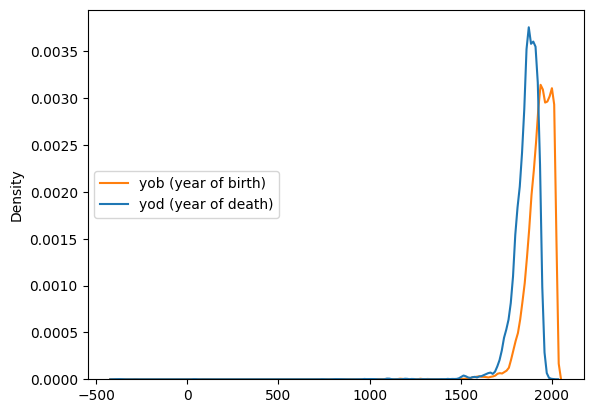

In [3]:
ax = sb.kdeplot(data=test_wdata_df)
# ax = sns.histplot(penguins, x="bill_length_mm", hue="species")
ax.legend(labels=['yob (year of birth)', 'yod (year of death)'])
sb.move_legend(ax, "center left")

In [4]:
# unique names parsed already by ruby gem package: dwcagent

match_results_collectors_cossim = pd.read_csv(
    # "data/results_bgbm_collectors_vs_wikidata-botanists_cossim-similarity_merged-data_20231030.csv", 
    "data/results_bgbm_collectors_vs_wikidata-botanists_cossim-similarity_merged-data_20260210.csv", # see section(s) of do_custom_data_aggregation
    index_col=0,
    low_memory=False
)

In [5]:
# unique names parsed already by ruby gem package: dwcagent
match_results_collectors_kneighbor = pd.read_csv(
    # "data/results_bgbm_collectors-eventDate_vs_wikidata-botanists_kneighbor_names-atomized_all-columns_20230823.csv"
    # "data/results_bgbm_collectors_vs_wikidata-botanists_kneighbor_names-atomized_all-columns-compact_20230920.csv"
    "data/results_bgbm_collectors_vs_wikidata-botanists_kneighbor_merged-data_20260210.csv", # see section(s) of do_custom_data_aggregation
    index_col=0,
    low_memory=False
)
# canonical_string_collector_parsed = namematch_source_data, df.assign(D=df.B)
if 'namematch_source_data' not in match_results_collectors_kneighbor.columns:
    print("copy column canonical_string_collector_parsed to namematch_source_data (namematch_source_data is missing but data are identical) ...")
    match_results_collectors_kneighbor=match_results_collectors_kneighbor.assign(namematch_source_data=match_results_collectors_kneighbor["canonical_string_collector_parsed"])
    # move namematch_source_data before namematch_resource_data
    col = match_results_collectors_kneighbor.pop("namematch_source_data")
    match_results_collectors_kneighbor.insert(match_results_collectors_kneighbor.columns.get_loc('namematch_resource_data'), col.name, col)
    print(match_results_collectors_kneighbor.columns)

In [6]:
pprint.pprint(match_results_collectors_cossim.columns)
pprint.pprint(match_results_collectors_kneighbor.columns)


Index(['canonical_string_collector_parsed', 'family', 'given',
       'occurrenceID_collectors_count', 'occurrenceID_collectors_firstsample',
       'source_data', 'namematch_source_data', 'namematch_resource_data',
       'namematch_similarity', 'item', 'canonical_string', 'itemLabel',
       'orcid', 'viaf', 'isni', 'harv', 'ipni', 'abbr', 'bionomia_id', 'yob',
       'yod'],
      dtype='str')
Index(['family', 'given', 'suffix', 'particle', 'dropping_particle', 'nick',
       'appellation', 'title', 'canonical_string_collector_parsed',
       'source_data', 'occurrenceID_collectors_count',
       'occurrenceID_collectors_firstsample', 'old_index',
       'namematch_source_data', 'namematch_resource_data',
       'namematch_distance', 'item', 'itemLabel', 'surname', 'initials',
       'canonical_string', 'canonical_string_fullname', 'orcid', 'viaf',
       'isni', 'harv', 'ipni', 'abbr', 'bionomia_id', 'yob', 'yod',
       'wikidata_link', 'orcid_link', 'harv_link', 'ipni_link',
    

In [7]:
print("Show example data of «Kotschy…» …")

Show example data of «Kotschy…» …


In [8]:
# criterion = match_results_collectors_cossim['canonical_string_collector_parsed'].map(lambda x: x.startswith('Kotschy'))
criterion = match_results_collectors_cossim['canonical_string_collector_parsed'].str.contains('Kotschy', na=False)
testdata=match_results_collectors_cossim[criterion][[
    # 'canonical_string_collector_parsed', # canonical_string_collector_parsed = namematch_source_data
    'occurrenceID_collectors_count', 'occurrenceID_collectors_firstsample',
    'namematch_source_data', 'namematch_resource_data', 'namematch_similarity', 
    # 'canonical_string_fullname', 
    'itemLabel', 'item'
]]
pprint.pprint(testdata.columns)
display(testdata)

Index(['occurrenceID_collectors_count', 'occurrenceID_collectors_firstsample',
       'namematch_source_data', 'namematch_resource_data',
       'namematch_similarity', 'itemLabel', 'item'],
      dtype='str')


,occurrenceID_collectors_count,occurrenceID_collectors_firstsample,namematch_source_data,namematch_resource_data,namematch_similarity,itemLabel,item
4213,1,http://id.snsb.info/snsb/collection/22980/3175...,C.G. Kotschy,Kotschy,0.876,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
4238,2494,http://id.snsb.info/snsb/collection/108230/167...,C.G.T. Kotschy,C. G. T. Kotschy,1.000,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
4239,2494,http://id.snsb.info/snsb/collection/108230/167...,C.G.T. Kotschy,C. G. T. Kotschy,1.000,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
4240,1,https://herbarium.bgbm.org/object/B100160086,C.G.T. Kotschyi,C. G. T. Kotschy,0.886,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
4241,1,https://herbarium.bgbm.org/object/B100160086,C.G.T. Kotschyi,C. G. T. Kotschy,0.886,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
24382,2,https://je.jacq.org/JE00022436,Carl Georg Theodor Kotschy,Carl Georg Theodor Kotschy,1.000,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
14326,37,http://id.snsb.info/snsb/collection/16719/2549...,K.G.T. Kotschy,K. G. T. Kotschy,1.000,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
14327,37,http://id.snsb.info/snsb/collection/16719/2549...,K.G.T. Kotschy,K. G. T. Kotschy,1.000,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
14328,37,http://id.snsb.info/snsb/collection/16719/2549...,K.G.T. Kotschy,K. G. T. Kotschy,1.000,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
24600,1,https://herbarium.bgbm.org/object/B101113772,Karl Georg Th Kotschy,Karl Georg Theodor Kotschy,0.788,Theodor Kotschy,http://www.wikidata.org/entity/Q113299


In [9]:
plotdata=testdata.sort_values("namematch_similarity", ascending=False)
display(plotdata)

# list(plotdata['namematch_resource_data'])[1]

,occurrenceID_collectors_count,occurrenceID_collectors_firstsample,namematch_source_data,namematch_resource_data,namematch_similarity,itemLabel,item
4238,2494,http://id.snsb.info/snsb/collection/108230/167...,C.G.T. Kotschy,C. G. T. Kotschy,1.000,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
4239,2494,http://id.snsb.info/snsb/collection/108230/167...,C.G.T. Kotschy,C. G. T. Kotschy,1.000,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
24382,2,https://je.jacq.org/JE00022436,Carl Georg Theodor Kotschy,Carl Georg Theodor Kotschy,1.000,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
14328,37,http://id.snsb.info/snsb/collection/16719/2549...,K.G.T. Kotschy,K. G. T. Kotschy,1.000,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
14327,37,http://id.snsb.info/snsb/collection/16719/2549...,K.G.T. Kotschy,K. G. T. Kotschy,1.000,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
14326,37,http://id.snsb.info/snsb/collection/16719/2549...,K.G.T. Kotschy,K. G. T. Kotschy,1.000,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
21990,310,http://id.snsb.info/snsb/collection/117808/176...,T. Kotschy,T. Kotschy,1.000,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
21989,310,http://id.snsb.info/snsb/collection/117808/176...,T. Kotschy,T. Kotschy,1.000,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
14580,2,https://dr.jacq.org/DR049432,Kotschy,Kotschy,1.000,Theodor Kotschy,http://www.wikidata.org/entity/Q113299
4240,1,https://herbarium.bgbm.org/object/B100160086,C.G.T. Kotschyi,C. G. T. Kotschy,0.886,Theodor Kotschy,http://www.wikidata.org/entity/Q113299


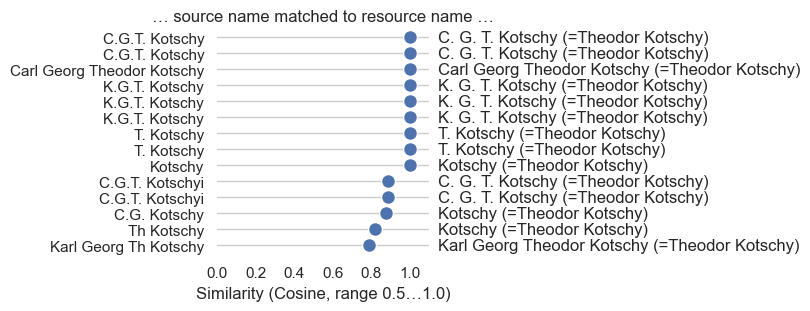

In [45]:
import seaborn as sns
sns.set_theme(style="whitegrid")

plotdata['helper_y'] = plotdata.index.astype(str) + " | " + plotdata['namematch_source_data'] 
    # Make the rows unique with the index, otherwise identical lines would be merged and y-levels 
    # and the y-axis would become disordered, mismatched to the pure data
y_order = plotdata['helper_y'].tolist()

max_similarity = plotdata['namematch_similarity'].max()
min_similarity = plotdata['namematch_similarity'].min()

# Make the PairGrid
g = sns.PairGrid(
    plotdata,
    x_vars=['namematch_similarity'], 
    y_vars=["helper_y"],
    height=3, aspect=1
)

# Draw a dot plot using the stripplot function
g.map(
    sns.stripplot, size=10, 
    orient="h", 
    jitter=False, 
    palette="flare_r", 
    linewidth=1, 
    edgecolor="w",
    order=y_order)


# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, max_similarity * 1.1), xlabel="Similarity (Cosine, range 0.5…1.0)", ylabel=""   )

# Use semantically meaningful titles for the columns
titles = ["… source name matched to resource name …"]

for ax, title in zip(g.axes.flat, titles):
    # 1. Explicitly set ticks to the number of rows
    ax.set_yticks(range(len(plotdata)))
    # 2. Now set the labels without warning
    ax.set_yticklabels(plotdata['namematch_source_data'].tolist())
    
    # Set a different title for each axes
    ax.set(
        title=title, 
        xticks=[x / 40 for x in range(0, round(max_similarity * 1.15 * 40), 8)]
        # print([x / 40 for x in range(0, round(max_similarity * 1.20 * 40), 8)]) # [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    )
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    
    row_indices = plotdata.index.tolist()
    # ax.tick_params(labelright=True)  # idea would be to reset ymajorticklabels on the secondary axis right or add manually text(x, y , customstring)
    # see also https://github.com/BindiChen/machine-learning/blob/main/data-visualization/0010-multiple-y-axis/multiple-y-axis-combo-chart.ipynb
    for this_y in ax.get_yticks():
        # print(ax.get_yticks()) # [0, 1, 2, 3, 4, 5, 6, 7, 8]
        if this_y >= len(plotdata): continue
            
        current_id = row_indices[this_y]        
        # Den Text zusammenbauen: Jetzt mit ID am Anfang
        label_text = "{name_match} (={itemLabel})".format(
            id=current_id,            
            name_match=plotdata['namematch_resource_data'].iloc[this_y],
            itemLabel=plotdata['itemLabel'].iloc[this_y]
        )
        # see https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text
        test=ax.text(
            x=max_similarity * 1.15, 
            y=this_y, 
            s=label_text,
            verticalalignment='center', fontstyle='normal', fontsize='medium'
        )

sns.despine(left=True, bottom=True) # remove box lines

In [11]:
# criterion = match_results_collectors_kneighbor['canonical_string_collector_parsed'].map(lambda x: x.startswith('Kotsch'))
criterion = match_results_collectors_kneighbor['canonical_string_collector_parsed'].str.contains('Kotschy', na=False)

testdata2 = match_results_collectors_kneighbor[criterion][[
    # 'canonical_string_collector_parsed', # canonical_string_collector_parsed = namematch_source_data
    'occurrenceID_collectors_count', 'occurrenceID_collectors_firstsample',
    'namematch_source_data', 'namematch_resource_data', 'namematch_distance', 
    # 'canonical_string_fullname', 
    'itemLabel', 'item'
]]

pprint.pprint(testdata.columns)

Index(['occurrenceID_collectors_count', 'occurrenceID_collectors_firstsample',
       'namematch_source_data', 'namematch_resource_data',
       'namematch_similarity', 'itemLabel', 'item'],
      dtype='str')


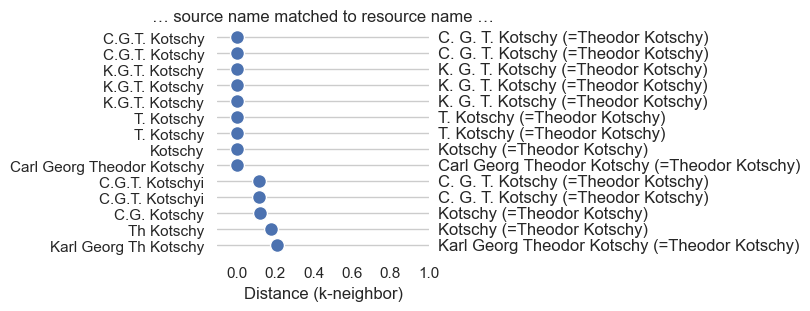

In [48]:
import seaborn as sns
sns.set_theme(style="whitegrid")

plotdata=testdata2.sort_values("namematch_distance", ascending=True)
plotdata['helper_y'] = plotdata.index.astype(str) + " | " + plotdata['namematch_source_data'] 
    # Make the rows unique with the index, otherwise identical lines would be merged and y-levels 
    # and the y-axis would become disordered, mismatched to the pure data
y_order = plotdata['helper_y'].tolist()

max_similarity = plotdata['namematch_distance'].max()
min_similarity = plotdata['namematch_distance'].min()

# Make the PairGrid
g = sns.PairGrid(
    plotdata,
    x_vars=['namematch_distance'], 
    y_vars=["helper_y"],
    height=3, aspect=1
)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w",
     order=y_order)

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(- 0.1, max_similarity * 1.1), xlabel="Distance (k-neighbor)", ylabel=""     )

# Use semantically meaningful titles for the columns
titles = ["… source name matched to resource name …"]

for ax, title in zip(g.axes.flat, titles):
    # 1. Explicitly set ticks to the number of rows
    ax.set_yticks(range(len(plotdata)))
    # 2. Now set the labels without warning
    ax.set_yticklabels(plotdata['namematch_source_data'].tolist())


    # Set a different title for each axes
    ax.set(
        title=title, 
        # xticks=[x / 40 for x in range(0, round(max_similarity * 1.15 * 40), 8)]
        xticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
        # print([x / 40 for x in range(0, round(max_similarity * 1.20 * 40), 8)]) # [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    )
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    
    # ax.tick_params(labelright=True)  # idea would be to reset ymajorticklabels on the secondary axis right or add manually text(x, y , customstring)
    # see also https://github.com/BindiChen/machine-learning/blob/main/data-visualization/0010-multiple-y-axis/multiple-y-axis-combo-chart.ipynb
    for this_y in ax.get_yticks():
        # print(ax.get_yticks()) # [0, 1, 2, 3, 4, 5, 6, 7, 8]
        test=ax.text(
            # x=max_similarity * 1.15, 
            x=1.05,
            y=this_y, 
            s="%s (=%s)" % (
                list(plotdata['namematch_resource_data'])[this_y],
                list(plotdata['itemLabel']              )[this_y]
            ),
            verticalalignment='center', fontstyle='normal', fontsize='medium'
        )

sns.despine(left=True, bottom=True) # remove box lines

In [13]:
# TODO review code of abbreviated names and full name matching
criterion_fullnames = match_results_collectors_kneighbor.given.str.contains('^\\w{3,}', na=False)
print("Show collecors given name has (propably) a full name (%s records) …" % len(match_results_collectors_kneighbor[criterion_fullnames].index))
match_results_collectors_kneighbor[criterion_fullnames]

Show collecors given name has (propably) a full name (557 records) …


,family,given,suffix,particle,dropping_particle,nick,appellation,title,canonical_string_collector_parsed,source_data,...,ipni,abbr,bionomia_id,yob,yod,wikidata_link,orcid_link,harv_link,ipni_link,bionomia_link
26908,Orbigny,ACVDd,NaN,NaN,NaN,NaN,NaN,NaN,ACVDd Orbigny,"Orbigny,A.C.V.D.d'",...,31988-1,A.D.Orb.,Q344661,1802.0,1857.0,http://www.wikidata.org/wiki/Q344661,NaN,https://kiki.huh.harvard.edu/databases/botanis...,https://www.ipni.org/a/31988-1,https://bionomia.net/Q344661
26909,Sauze,Abbé,NaN,NaN,NaN,NaN,NaN,NaN,Abbé Sauze,"Sauze,Abbé,J.",...,NaN,NaN,NaN,1832.0,1905.0,http://www.wikidata.org/wiki/Q113971117,NaN,https://kiki.huh.harvard.edu/databases/botanis...,NaN,NaN
26910,Hassan,Abdisalam Sheikh,NaN,NaN,NaN,NaN,NaN,NaN,Abdisalam Sheikh Hassan,"Friis,I., Vollesen,K. & Abdisalam Sheikh Hassan",...,37521-1,A.S.Hassan,NaN,NaN,NaN,http://www.wikidata.org/wiki/Q33675393,NaN,NaN,https://www.ipni.org/a/37521-1,NaN
26911,Hassan,Abdisalem Sheikh,NaN,NaN,NaN,NaN,NaN,NaN,Abdisalem Sheikh Hassan,"Friis,I, Vollesen,K., & Abdisalem Sheikh Hassan",...,37521-1,A.S.Hassan,NaN,NaN,NaN,http://www.wikidata.org/wiki/Q33675393,NaN,NaN,https://www.ipni.org/a/37521-1,NaN
26912,Khalek,Abel,NaN,el,NaN,NaN,NaN,NaN,Abel el Khalek,Abel el Khalek,...,35-1,Abel,NaN,1763.0,1822.0,http://www.wikidata.org/wiki/Q10290737,NaN,https://kiki.huh.harvard.edu/databases/botanis...,https://www.ipni.org/a/35-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27460,Chang,Zhao Y.,NaN,NaN,NaN,NaN,NaN,NaN,Zhao Y. Chang,"Chang, Zhao Y. (no. 2004-449)",...,20007145-1,Zhao Y.Chang,NaN,NaN,NaN,http://www.wikidata.org/wiki/Q33666688,NaN,NaN,https://www.ipni.org/a/20007145-1,NaN
27461,Liu,Zheng-yu,NaN,NaN,NaN,NaN,NaN,NaN,Zheng-yu Liu,"Liu,Zheng-yu",...,14422-1,Z.Y.Liu,NaN,1952.0,NaN,http://www.wikidata.org/wiki/Q21519359,NaN,NaN,https://www.ipni.org/a/14422-1,NaN
27462,Zhuo,Zhou,NaN,NaN,NaN,NaN,NaN,NaN,Zhou Zhuo,"Kilian,N., Raab-Straube,E. von, Zhang Jianwen,...",...,20032145-1,Z.Zhou,NaN,NaN,NaN,http://www.wikidata.org/wiki/Q47129734,NaN,NaN,https://www.ipni.org/a/20032145-1,NaN
27463,Heldreich,von,NaN,NaN,NaN,NaN,NaN,NaN,von Heldreich,"Heldreich,von",...,14225-1,I.Heldr.,NaN,NaN,NaN,http://www.wikidata.org/wiki/Q36582833,NaN,NaN,https://www.ipni.org/a/14225-1,NaN


## Documentation

TODO document columns

Explanation of columns:

Column | Description
-|-
**Botanical collectors** |
family | parsed family name
given | parsed given name
suffix | suffix from name parsing
particle | particle from name parsing
dropping_particle | dropping_particle from name parsing
nick | nick name from name parsing
appellation | appellation from name parsing
title | title from name parsing
occurrenceID_collectors_count | count of all occurrenceID of one particular collector name
occurrenceID_collectors_firstsample | a data sample of an occurrenceID 
eventDate | date of the sampling event (required by GBIF, see https://www.gbif.org/data-quality-requirements-sampling-events)
eventDate_min | calculated earliest date of all the sampling events within the data
eventDate_max | calculated latest date of all the sampling events within the data
eventDate_mean | calculated mean date of all the sampling events within the data
TODO activity_span | Number of years between first and last collection
**Name matching** |
namematch_source_data | matched name of the collector data set
namematch_resource_data | matched name of Wikidata the collector was tried to matched to
namematch_similarity | calculated cosine-similarity
**Wikidata** |
item | Wikidata Item ID (URL)
itemLabel | Wikidata Item label (perhaps similar to the full name)
surname	| Surname; derived from item label
initials | Initials; derived from item label
canonical_string | Canonical name string; derived from item label, used for matching
orcid | ORCID ([P496](https://www.wikidata.org/wiki/Property:P496))
viaf | VIAF ID ([P214](https://www.wikidata.org/wiki/Property:P214))
isni | ISNI ID ([P213](https://www.wikidata.org/wiki/Property:P496))	
harv | Harvard Index of Botanists ID ([P6264](https://www.wikidata.org/wiki/Property:P6264))
ipni | IPNI author ID ([P586](https://www.wikidata.org/wiki/Property:P586))
abbr | botanist author abbreviation (standard form) ([P428](https://www.wikidata.org/wiki/Property:P428))
bionomia_id | identifier for a collector and/or determiner of natural history specimens, in the Bionomia database ([P6944](https://www.wikidata.org/wiki/Property:P6944))
yob	| Year of birth (derived from [P569](https://www.wikidata.org/wiki/Property:P569))
yod	| Year of death (derived from [P496](https://www.wikidata.org/wiki/Property:P570))
wyb	| Work year period begin ([P2031](https://www.wikidata.org/wiki/Property:P2031))
wye | Work year period end ([P2032](https://www.wikidata.org/wiki/Property:P2032))